In [3]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("asaniczka/uk-optimal-product-price-prediction")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\enrik\.cache\kagglehub\datasets\asaniczka\uk-optimal-product-price-prediction\versions\3


In [5]:
archivo = r"C:\Users\enrik\.cache\kagglehub\datasets\asaniczka\uk-optimal-product-price-prediction\versions\3\amz_uk_price_prediction_dataset.csv"
df = pd.read_csv(archivo)

In [6]:
df.sample(10)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
947058,1032205,B0CGX66T5Z,Mens Linen Shirts Long Sleeve Cuffed Short Sle...,0.0,0,14.65,False,0,Sports & Outdoors
420127,451613,B0CDB82WFB,Fashionable V-Neck Women's Three-Quarter Sleev...,0.0,0,16.14,False,0,Sports & Outdoors
998940,1105395,B0BMGWGWCT,"Luxembourg City Skyline art print poster, FRAM...",0.0,0,33.98,False,0,Handmade Artwork
879961,957521,B06XGDGQ36,Cartridge World Compatible with HP 363 Yellow ...,0.0,0,8.82,False,0,Printers & Accessories
1947258,2193379,B09V8GQVFS,Springbok's 500 Piece Jigsaw Puzzle Bird Bath ...,4.4,34,14.00,False,0,Jigsaws & Puzzles
209243,223599,B09WVRBK61,"Vivifying Snuffle Mat for Dogs, Interactive Fe...",4.3,523,16.99,False,800,Pet Supplies
1016384,1124696,B0C72N2P4W,Sport Basketball Baseball Soccer Star Blue Per...,0.0,0,69.98,False,0,Basketball Footwear
660366,709633,B0CFTRS2X5,Pink Nail Polish Set - Glitter Pink Nail Varni...,0.0,0,6.79,False,0,Manicure & Pedicure Products
2257289,2605791,B07W97T2PG,sourcing map 2Pcs 44mm x 66mm Speaker Port Tub...,5.0,1,9.49,False,0,Hi-Fi Speakers
795094,856706,B0C3MZYFG5,Nyxi Folding Chairs Premium Quality with Padde...,4.8,55,33.99,False,50,School & Educational Supplies


# Part 1

In [8]:
# Objective: Understand the relationship between product categories and their best-seller status

In [9]:
crosstab = pd.crosstab(df["category"], df["isBestSeller"])
crosstab

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [10]:
sorted_crosstab = crosstab.sort_values(by=True, ascending=False) #we organize by column True in descending order
sorted_crosstab

isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Sports & Outdoors,835935,330
Power & Hand Tools,8353,306
...,...,...
Downhill Ski Boots,1284,0
Digital Frames,774,0
Motorbike Chassis,107,0


In [11]:
# Grocery and personal care are the categories with highest best sellers, followed by baby and Power Tools.
# We can see that they are all more intimate categories. For example, something that you eat, or that you want to give
# to your baby, need a trusted seller. Meanwhile, ebooks or clothing do not need that much trust

In [12]:
# Chi test

In [13]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(crosstab)

In [14]:
print("Chi-square test statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-square test statistic: 36540.20270061387
p-value: 0.0
Degrees of freedom: 295
Expected frequencies:
 [[2.47190130e+02 8.09870149e-01]
 [4.05371878e+03 1.32812173e+01]
 [2.49183599e+02 8.16401360e-01]
 [1.69145827e+03 5.54173243e+00]
 [2.53170536e+02 8.29463782e-01]
 [8.50214439e+03 2.78556144e+01]
 [1.06650580e+02 3.49419782e-01]
 [2.57157474e+02 8.42526204e-01]
 [9.51781673e+03 3.11832664e+01]
 [1.50008526e+04 4.91473619e+01]
 [9.32544700e+03 3.05530045e+01]
 [2.38219520e+02 7.80479700e-01]
 [3.22941944e+03 1.05805616e+01]
 [9.44704859e+03 3.09514084e+01]
 [6.68808779e+03 2.19122125e+01]
 [5.26275760e+02 1.72423967e+00]
 [1.90296531e+04 6.23469391e+01]
 [2.77191835e+03 9.08164873e+00]
 [2.53170536e+02 8.29463782e-01]
 [4.04674164e+02 1.32583581e+00]
 [1.92489346e+04 6.30653723e+01]
 [3.10482764e+03 1.01723609e+01]
 [2.04330551e+02 6.69449115e-01]
 [6.28839730e+03 2.06027047e+01]
 [5.23385231e+03 1.71476942e+01]
 [9.52180367e+03 3.11963288e+01]
 [2.48186864e+02 8.13135755e-01]
 [9.

In [15]:
alpha = 0.05
if p < alpha:
    print("We reject the null hyphotesis; there is a relationship between these 2 features")
else:
    print("We accept the null hypothesis; these variables are independent one of each other")

We reject the null hyphotesis; there is a relationship between these 2 features


In [16]:
# Cramer´s test

In [17]:
n = crosstab.values.sum()  # Total number of observations
min_dim = min(crosstab.shape) - 1  # Minimum dimension (k - 1 or r - 1)
cramers_v = np.sqrt(chi2 / (n * min_dim))

In [18]:
cramers_v

0.1222829439760564

In [19]:
if cramers_v < 0.1:
    strength = "negligible"
elif cramers_v < 0.3:
    strength = "weak"
elif cramers_v < 0.5:
    strength = "moderate"
else:
    strength = "strong"
    
print(f"Strength of association: {strength}")

Strength of association: weak


In [20]:
# Categories and isBestSeller are related in a soft way. Probably there are categories like Babies with a strong connection
# and most of the categories have a random relationship with top sellers

In [21]:
# Stacked Bar Chart (Gráfico de Barras Apiladas)

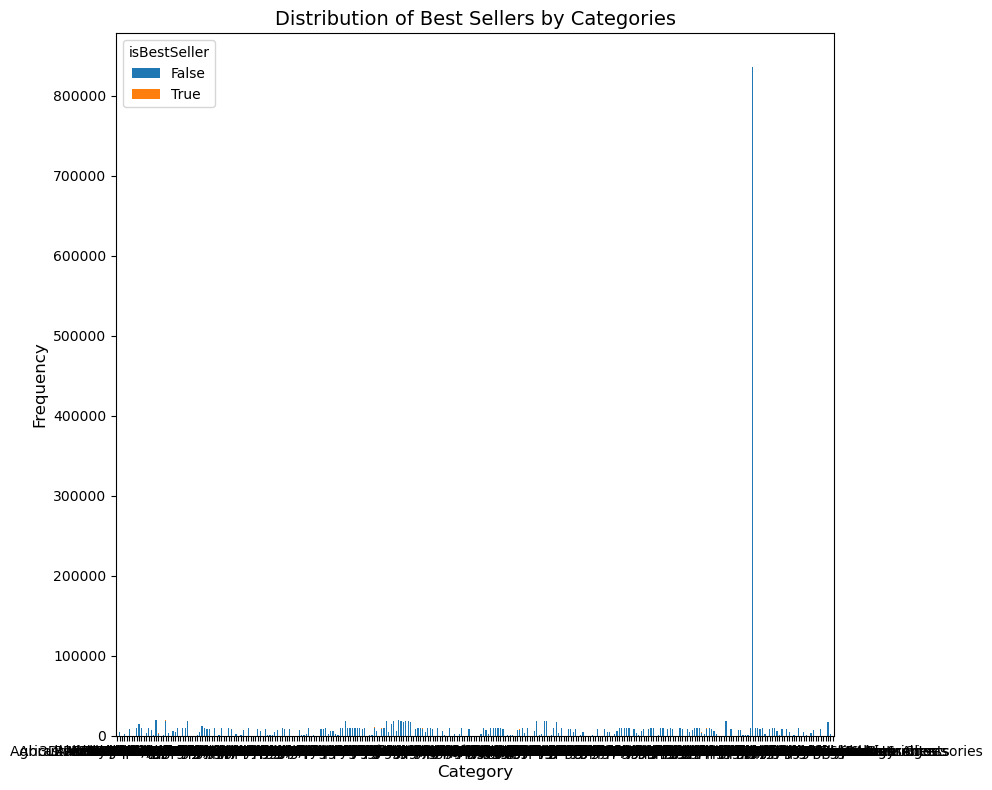

In [22]:
crosstab.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.title("Distribution of Best Sellers by Categories", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=0, fontsize=10)

plt.tight_layout() #herramienta para ajustar el gráfico
plt.show()

In [23]:
top_10_crosstab = sorted_crosstab.head(10).drop(index="Sports & Outdoors")

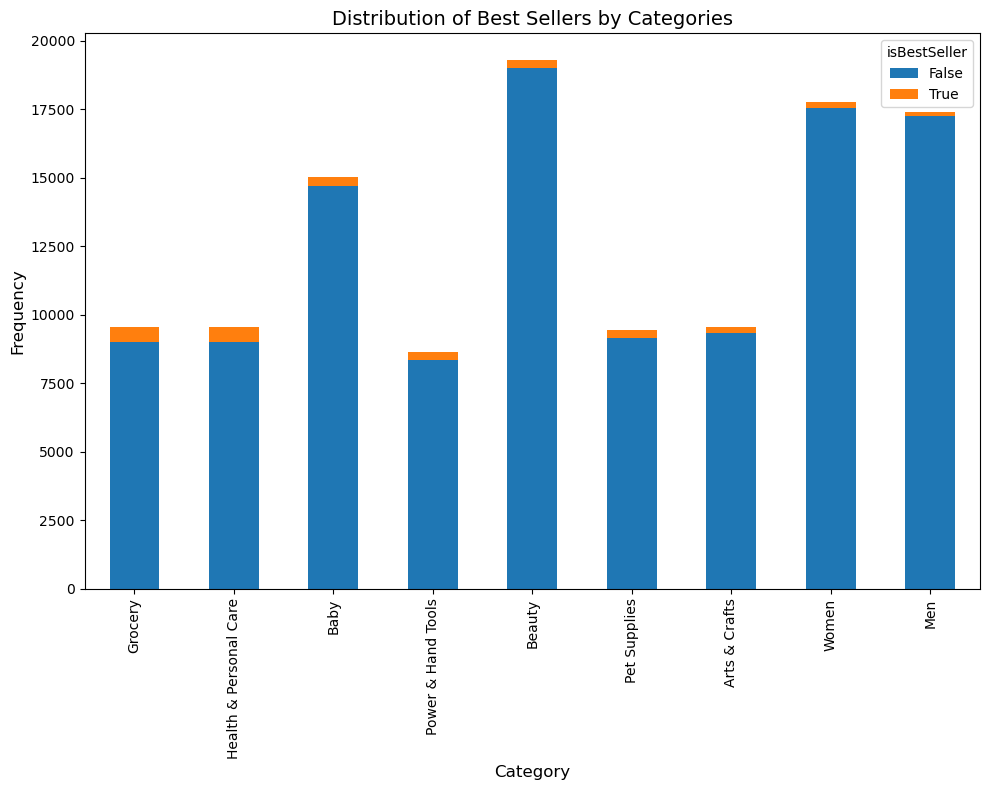

In [24]:
top_10_crosstab.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.title("Distribution of Best Sellers by Categories", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=90, fontsize=10)

plt.tight_layout() #herramienta para ajustar el gráfico
plt.show()

# Part 2

In [26]:
# Objective: Investigate how different product categories influence product prices.

In [27]:
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)

IQR = Q3 - Q1

lowerpoint = Q1 - 1.5 * IQR
highpoint = Q3 + 1.5 * IQR

In [28]:
# let´s filter the data by those rows which are in this range

# no_outliers_df = df[(df["price"] - lowerpoint) and (df["price" - highpoint])]

In [29]:
# for pandas we use & instead of "and" since it works element-wise
no_outliers_df = df[(df["price"] >= lowerpoint) &  (df["price"] <= highpoint)]

In [30]:
no_outliers_df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [31]:
top_categories = df["category"].value_counts().head(20)

In [32]:
#no_outliers_df = no_outliers_df[no_outliers_df["category"].isin(top_categories)] #creo que en esta línea se me queda vacío el nuevo dataframe

In [34]:
no_outliers_df["category"].unique()

array(['Hi-Fi Speakers', 'CD, Disc & Tape Players', 'Wearable Technology',
       'Light Bulbs', 'Bathroom Lighting',
       'Heating, Cooling & Air Quality', 'Coffee & Espresso Machines',
       'Lab & Scientific Products', 'Smart Speakers',
       'Motorbike Clothing', 'Motorbike Accessories',
       'Motorbike Batteries', 'Motorbike Boots & Luggage',
       'Motorbike Chassis', 'Handmade Home & Kitchen Products',
       'Hardware', 'Storage & Home Organisation',
       'Fireplaces, Stoves & Accessories', 'PC Gaming Accessories',
       'USB Gadgets', 'Blank Media Cases & Wallets', 'Car & Motorbike',
       'Boys', 'Sports & Outdoors', 'Microphones', 'String Instruments',
       'Karaoke Equipment', 'PA & Stage',
       'General Music-Making Accessories', 'Wind Instruments',
       'Handmade Gifts', 'Fragrances', 'Calendars & Personal Organisers',
       'Furniture & Lighting', 'Computer Printers', 'Ski Goggles',
       'Skiing Poles', 'Downhill Ski Boots', 'Hiking Hand & Foot Warmer

In [35]:
no_outliers_df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


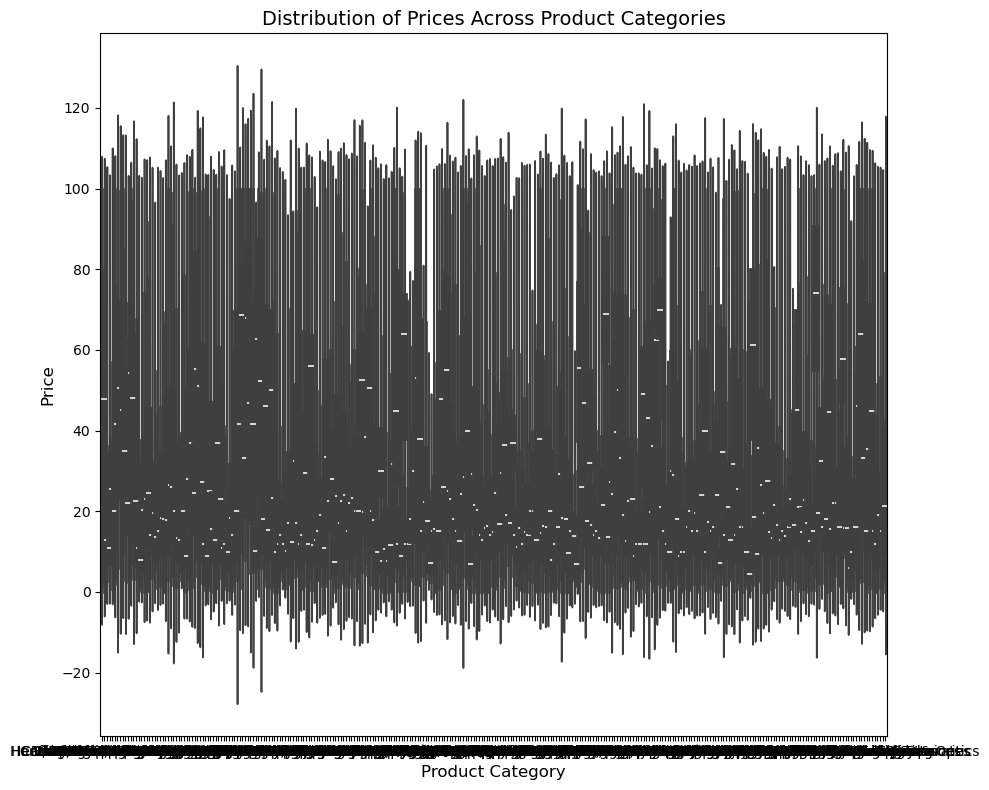

In [36]:
#Violin plot

plt.figure(figsize=(10, 8))
sns.violinplot(x="category", y='price', data=no_outliers_df)

plt.title('Distribution of Prices Across Product Categories', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.tight_layout()
plt.show()

In [80]:
median_prices = no_outliers_df.groupby("category")["price"].median().sort_values(ascending=False)
median_prices

category
Desktop PCs              74.00
Boxing Shoes             69.79
Tablets                  69.00
Graphics Cards           68.54
Motherboards             67.92
                         ...  
Adapters                  7.05
Make-up                   7.00
Signs & Plaques           6.99
Arts & Crafts             5.99
Office Paper Products     4.37
Name: price, Length: 296, dtype: float64

In [ ]:
# terminar plots cuando consiga filtrar top 10 categorías

# Part 3

In [85]:
no_outliers_df["price"].corr(no_outliers_df["stars"])

-0.0776729987818137

In [ ]:
# the coeficient of correlation is so close to zero that we can say there is no correlation between price and rating

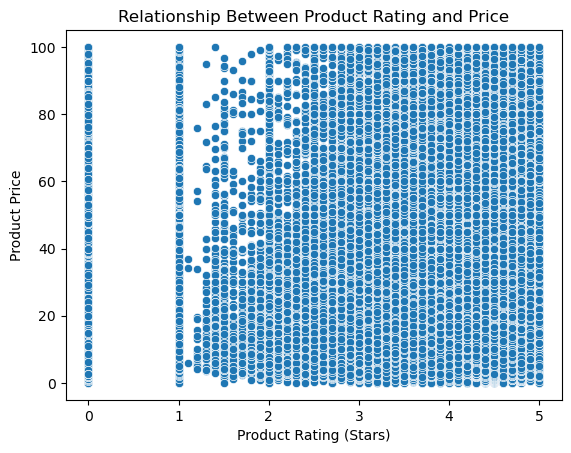

In [87]:
sns.scatterplot(x='stars', y='price', data=no_outliers_df)
plt.title('Relationship Between Product Rating and Price')
plt.xlabel('Product Rating (Stars)')
plt.ylabel('Product Price')
plt.show()

In [ ]:
# the only correlation that we can appreciate is that when the rating is low, it is barely more probably that the product is cheap

In [91]:
numeric_df = no_outliers_df.select_dtypes(include=['float64', 'int64'])

In [93]:
correlation_matrix = numeric_df.corr() #let´s calculate the correlation matrix

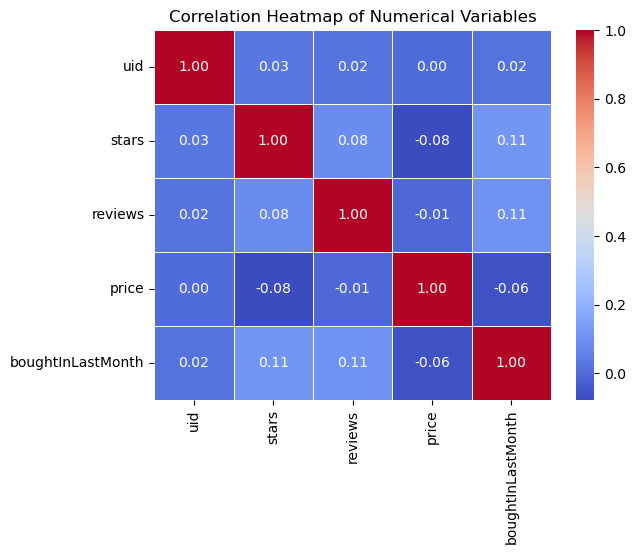

In [95]:
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

In [ ]:
# We can observe that there is no correlations between our numerical features in the Dataset

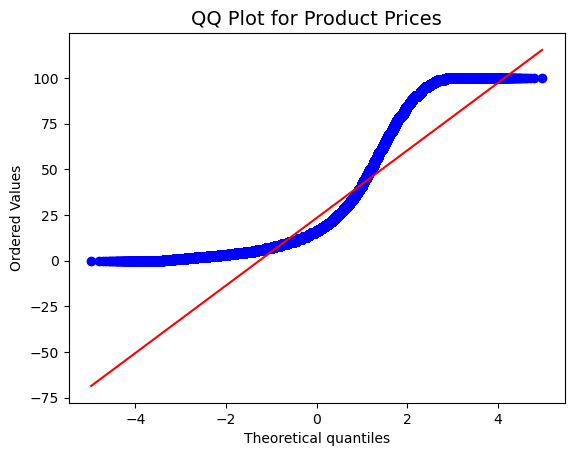

In [97]:
import scipy.stats as stats
stats.probplot(no_outliers_df['price'], dist="norm", plot=plt) #This function compares the distribution of the price column to a normal distribution. It takes the data (no_outliers_df['price']) and plots the quantiles against a standard normal distribution (dist="norm").
plt.title('QQ Plot for Product Prices', fontsize=14)
plt.show()

In [ ]:
# we can see that the column prices is not normally distributed as the points deviate significantly from the line
# we can see 2 tails, 1 because of those prices of 0 euros and another one indicating the presence of many expensive products
                                                  